In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import repos.pyjunk.junktools as junktools
from repos.pyjunk.junktools import utils
import numpy as np

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = utils.load_mnist(include_labels=True)
print(mnist_train_x.shape)
print(mnist_train_y.shape)

min_class = np.min(mnist_train_y)
max_class = np.max(mnist_train_y)
n_classes = (max_class - min_class) + 1

print("Min class: %d max class: %d, total classes: %d" % (min_class, max_class, n_classes))

(60000, 28, 28, 1)
(60000,)
Min class: 0 max class: 9, total classes: 10


In [6]:
from repos.pyjunk.models.GAN.DCGAN import DCGAN
from repos.pyjunk.solvers.SGANTorchSolver import SGANTorchSolver

import repos.pyjunk.junktools.pytorch_utils as ptu
ptu.SetGPUMode(True)

B, H, W, C = mnist_train_x.shape
input_shape = (H, W, C)
input_dim = H * W * C

ganModel = DCGAN(
    input_shape = input_shape,
    latent_dim = 64,
    n_layers = 10,
    n_filters = 128
)

# Set up the solver
dictSolverParams = {
    'lr': 2e-4,
    'epochs': 50,
    'strOptimizer': 'Adam',
    'batch_size': 128,
    'n_critic': 1,
    'betas': (0.5, 0.999)
}

# # test gen, disc
# test = ganModel.sample(10)
# print(test.shape)
# pred_fake = ganModel.discriminator(test)
# print(pred_fake.shape)

solver = SGANTorchSolver(ganModel, dictSolverParams)
solver.train_gan_epochs(mnist_train_x, fVerbose=False)

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

Batch:   0%|          | 0/469 [00:00<?, ?it/s]

array([0.27870208, 0.0767004 , 0.20651605, 0.21343291, 0.23108348,
       0.2749426 , 0.26896688, 0.29840498, 0.29050038, 0.34433122,
       0.32883703, 0.31745469, 0.31166175, 0.32374045, 0.31534409,
       0.30518399, 0.32352751, 0.3147779 , 0.32404901, 0.31064185,
       0.32019548, 0.30157282, 0.31257733, 0.31275523, 0.31666016,
       0.30625914, 0.31418357, 0.30174444, 0.29181101, 0.30588184,
       0.3058535 , 0.31126135, 0.30937024, 0.30385716, 0.29305893,
       0.3017333 , 0.29713048, 0.30410272, 0.29368976, 0.29977464,
       0.29701656, 0.28796755, 0.28403506, 0.28823473, 0.2947212 ,
       0.29222278, 0.30567949, 0.285251  , 0.29719244, 0.290726  ])

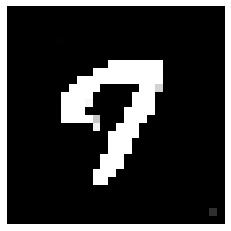

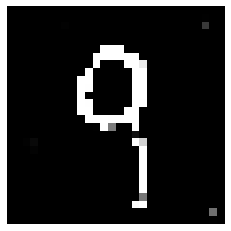

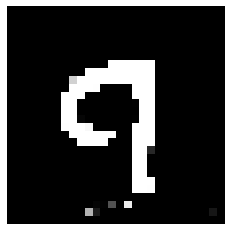

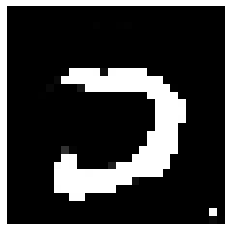

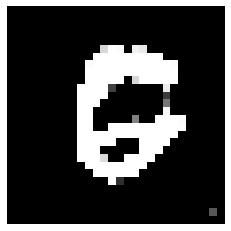

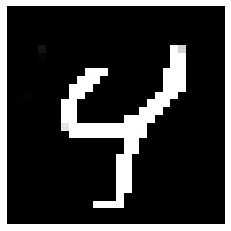

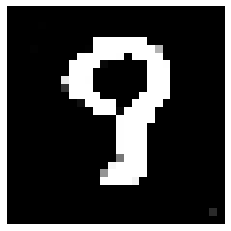

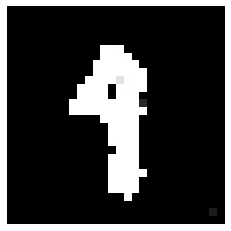

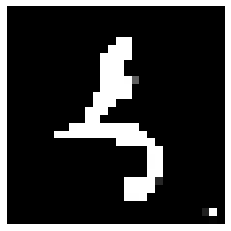

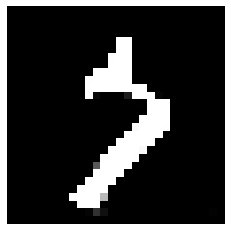

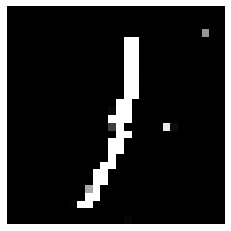

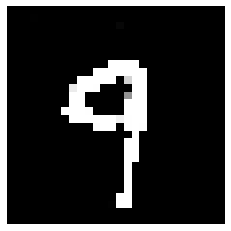

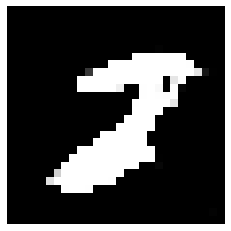

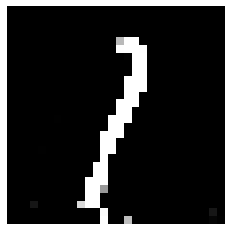

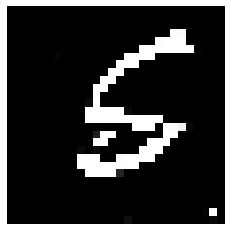

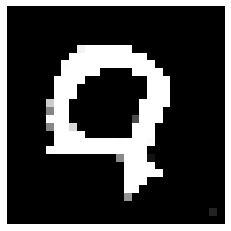

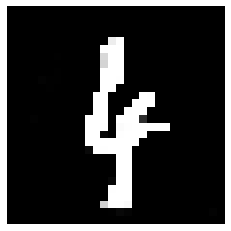

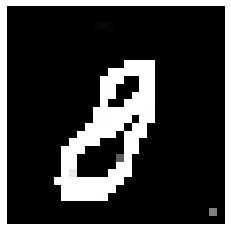

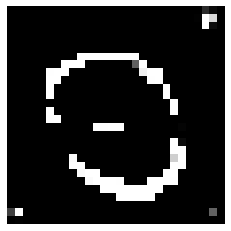

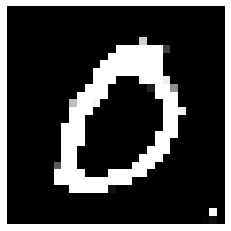

In [7]:
from repos.pyjunk.junktools.image import image

samples = ganModel.sample(20)
for sample in samples:
    newImage = image(torchBuffer=sample)
    newImage.visualize()

# #print(list(ganModel.generator.parameters()))
# print(list(ganModel.discriminator.parameters()))

## Windridge Dataset

In [1]:
%load_ext autoreload
%autoreload 2

# load new frame-set

from repos.pyjunk.junktools.frameset import frameset

frameset_res = 32
#strNewFramesetName = 'primitives_64_wht'
strFramesetBaseName = 'wr_210518'
strFramesetName = strFramesetBaseName + '_' + str(frameset_res)
img_size = 32
batch_size = 128
test_batch_size = 128
#num_frames = 4900
#num_frames = 100
num_frames = None

orig_frameset = frameset(strFramesetName, num_frames=num_frames, fJITLoading=True, fVerbose=False)
orig_frameset.Print()
print(orig_frameset.shape())

# Split up into Conditional and RGB Target framesets
framesetRGB = frameset(
    sourceFrameset=orig_frameset, 
    strNewFramesetName=strFramesetBaseName + "RGB", 
    sourceChannels=['Color']
)

framesetRGB.Print()
#framesetRGB[0].visualize()

# #spheresCond.visualize()
# #framesetRGB.visualize()

# Shape of a single frame
print(framesetRGB.shape())

# split spheresRGB into spheresRGB_train, speheresRGB_test

framesetRGB_train, framesetRGB_test = framesetRGB.split_into_train_and_test(0.8)
print(framesetRGB_train.shape())
print(framesetRGB_test.shape())

framesetRGB_train[0].visualize()

Loading frames 1 to 3482


frame:   0%|          | 0/3481 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
from repos.pyjunk.models.GAN.DCGAN import DCGAN
from repos.pyjunk.solvers.SGANTorchSolver import SGANTorchSolver

import repos.pyjunk.junktools.pytorch_utils as ptu
#ptu.SetGPUMode(True)

B, H, W, C = framesetRGB_train.shape()
input_shape = (H, W, C)
input_dim = H * W * C

ganModel = DCGAN(
    input_shape = input_shape,
    latent_dim = 64,
    n_layers = 10,
    n_filters = 128
)

# Set up the solver
dictSolverParams = {
    'lr': 2e-4,
    'epochs': 50,
    'strOptimizer': 'Adam',
    'batch_size': 128,
    'n_critic': 1,
    'betas': (0.5, 0.999)
}

# # test gen, disc
# test = ganModel.sample(10)
# print(test.shape)
# pred_fake = ganModel.discriminator(test)
# print(pred_fake.shape)

solver = SGANTorchSolver(ganModel, dictSolverParams)
solver.train_gan_epochs_frameset(framesetRGB_train, fVerbose=False)

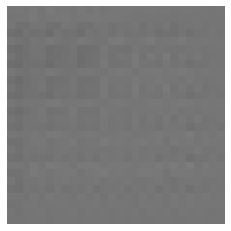

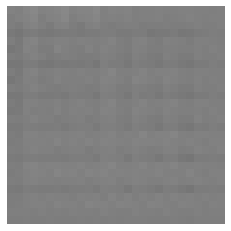

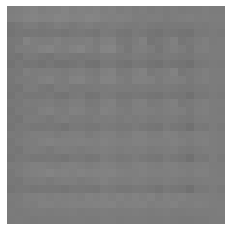

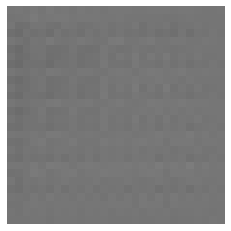

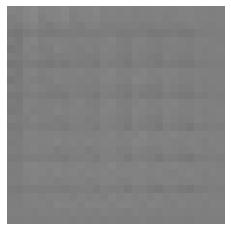

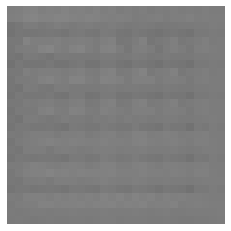

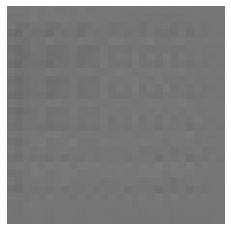

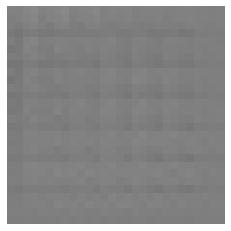

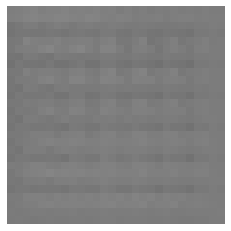

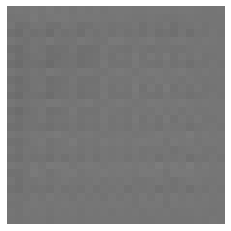

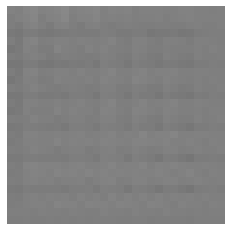

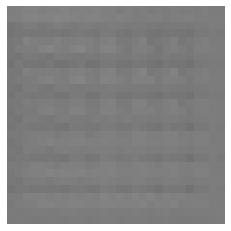

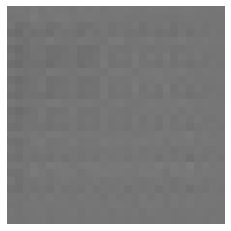

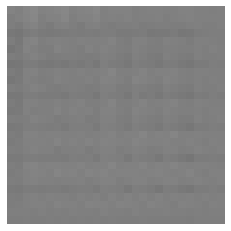

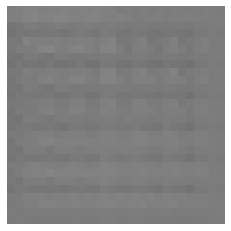

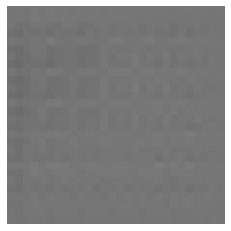

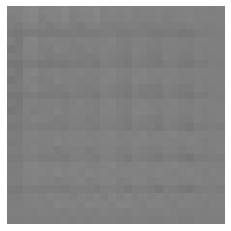

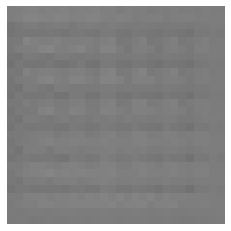

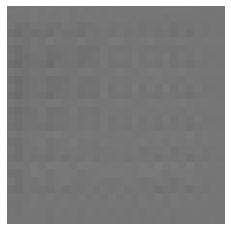

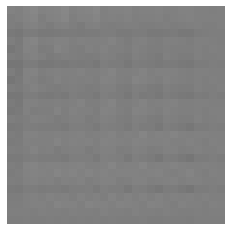

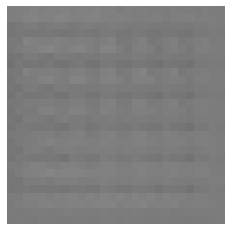

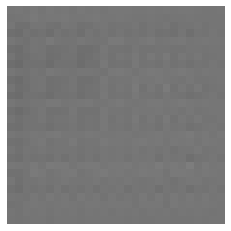

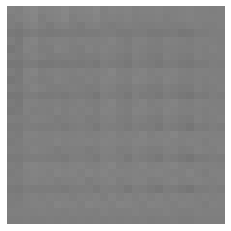

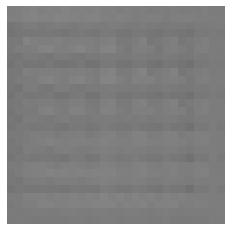

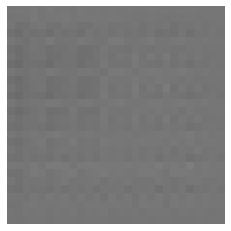

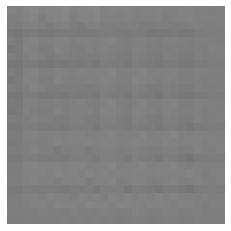

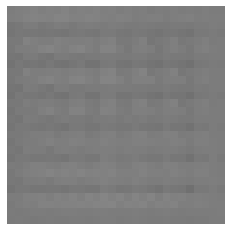

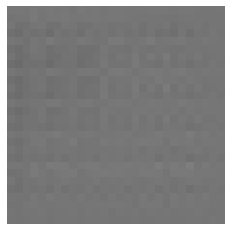

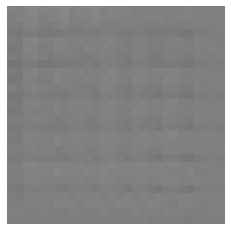

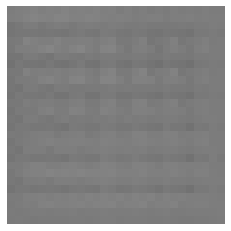

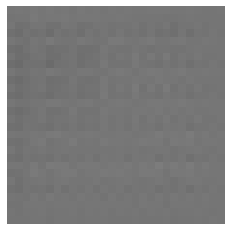

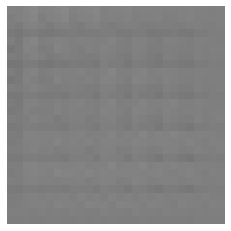

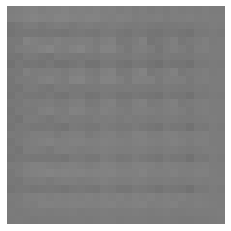

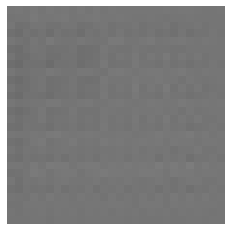

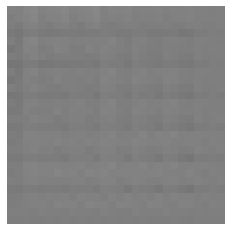

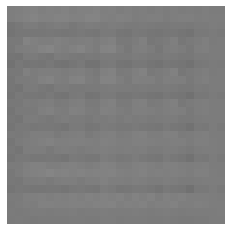

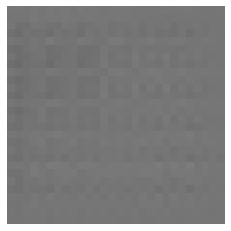

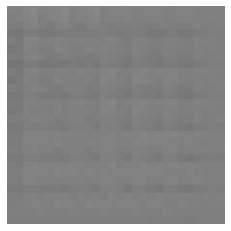

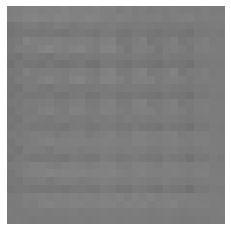

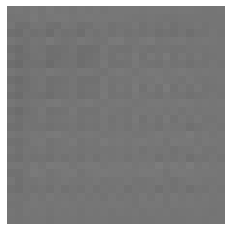

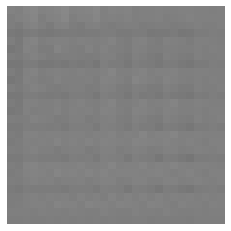

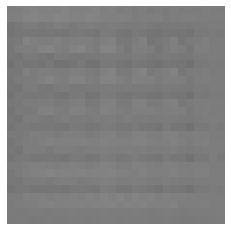

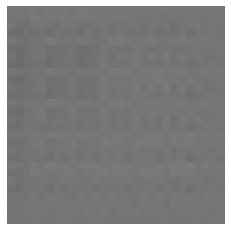

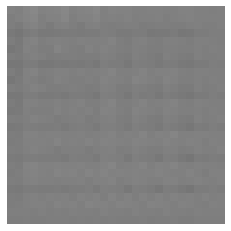

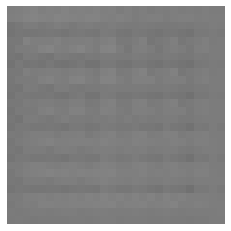

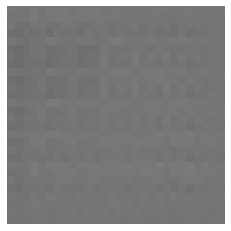

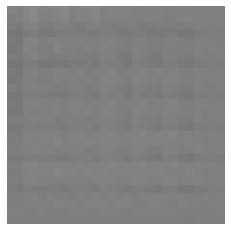

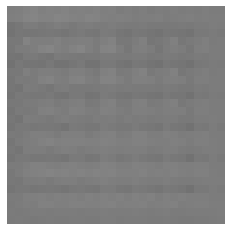

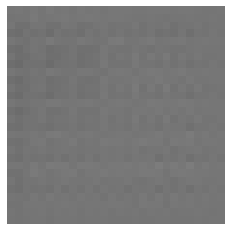

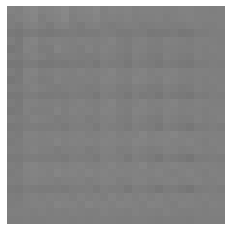

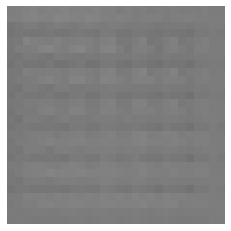

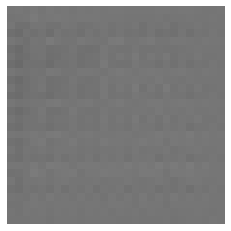

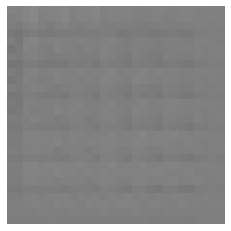

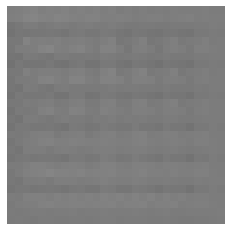

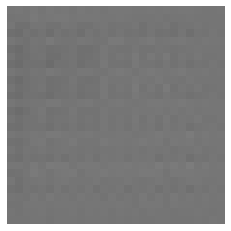

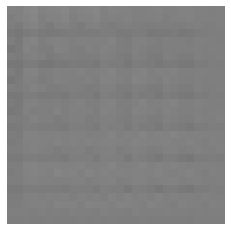

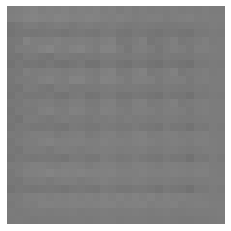

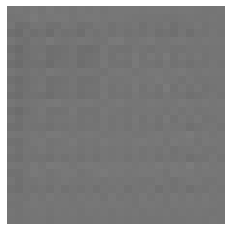

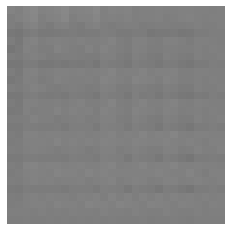

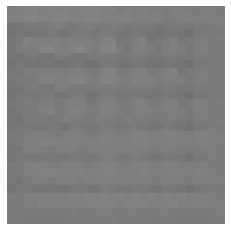

In [11]:
from repos.pyjunk.junktools.image import image

samples = ganModel.sample(20)
for sample in samples:
    newImage = image(torchBuffer=sample)
    newImage.visualize()

# #print(list(ganModel.generator.parameters()))
# print(list(ganModel.discriminator.parameters()))